In [1]:
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Serializing to a file
import _pickle as pickle

#Libraries for Graph
import networkx as nx

#etc
import random 
from collections import defaultdict

In [2]:
#accessing mongoDB
client = MongoClient()
database = client['food_map']   # Database name (to connect to)
collections = database['flavor_molecules']

#Getting the dataset from MongoDB into Pandas
flavorDB_pandas = pd.DataFrame(list(collections.find()))
flavorDB_pandas = flavorDB_pandas[["_id", "ingredient", "catgeory", "molecules", "molecule_IDs"]]

#Making each list into a set
flavorDB_pandas["set_molecules"] = flavorDB_pandas["molecules"].apply(lambda row: set(row))
flavorDB_pandas["set_molecules_ID"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: set(row))
flavorDB_pandas["molecule_quantity"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: len(row))


In [3]:
flavorDB_pandas.head()

,_id,ingredient,catgeory,molecules,molecule_IDs,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Egg,Animal Product,"[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","{lactic acid, 2,5-Dimethylfuran, Pyrrole, L-ar...","{3776, 1068, 6140, 6561, 612, 12748, 12232, 12...",55
1,5ca27b9113218a1eabac63d7,Bakery Products,Bakery,"[2,3-Dimethylpyrazine, 2,5-Dimethylpyrazine, 2...","[22201, 31252, 26331, 27457, 7976, 26808]","{2,5-Dimethylpyrazine, 2-Ethylpyrazine, 2-Meth...","{7976, 26808, 22201, 26331, 31252, 27457}",6
2,5ca27b9213218a1eabac63d8,Bread,Bakery,"[coumarin, Methyl Benzoate, 3-Hexanone, Gerani...","[323, 7150, 11509, 637566, 439341, 33931, 9261...","{Heptanal, Ethyl Acetate, 2-Acetylpyridine, ac...","{1889, 3893, 643941, 6050, 12232, 637566, 7895...",129
3,5ca27b9313218a1eabac63d9,Rye Bread,Bakery,"[2-Methylbutyl Acetate, 3-methylthiopropanol, ...","[12209, 10448, 5372954, 8468, 643731, 7344, 18...","{thiamine, 3-(Methylthio)propionaldehyde, guai...","{8468, 8908, 25915, 6561, 999, 12209, 12020, 8...",30
4,5ca27b9413218a1eabac63da,Wheaten Bread,Bakery,"[Difurfuryl ether, 2-Undecanone, Octyl acetate...","[263034, 8163, 8164, 12170, 228583, 9589, 6375...","{Pyrrole, 2-Phenylethyl formate, Difurfuryl et...","{637564, 6915, 19310, 228583, 26334, 61303, 31...",30


In [4]:
with open('flavorDB_pandas.pickle', 'wb') as file:
    file.write(pickle.dumps(flavorDB_pandas))
    file.close()

In [5]:
print("total number of ingredients: ", len(flavorDB_pandas["ingredient"]))

total number of ingredients:  935


In [6]:
flavorDB_pandas["catgeory"].unique()

array(['Animal Product', 'Bakery', 'Beverage', 'Beverage Alcoholic',
       'Beverage Caffeinated', 'Cereal', 'Maize', 'Dairy',
       'Essential Oil', 'Berry', 'Seafood', 'Fish', 'Flower', 'Fruit',
       'Fruit-Berry', 'Fruit Citrus', 'Fruit Essence', 'Fungus', 'Herb',
       'Meat', 'Dish', 'Nut', 'Seed', 'Legume', 'Plant Derivative',
       'Plant', 'Spice', 'Vegetable', 'Cabbage', 'Vegetable Root',
       'Vegetable Fruit', 'Gourd', 'Vegetable Stem', 'Vegetable Tuber',
       'Additive'], dtype=object)

In [7]:
print("the mean number of flavor molecules per ingredient: ", flavorDB_pandas["molecule_quantity"].mean())

the mean number of flavor molecules per ingredient:  64.4524064171123


In [8]:
print("the median number of flavor molecules per ingredient: ", flavorDB_pandas["molecule_quantity"].median())

the median number of flavor molecules per ingredient:  47.0


(array([455.,  42., 263.,  91.,  45.,  24.,  12.,   2.,   0.,   1.]),
 array([  1.,  40.,  79., 118., 157., 196., 235., 274., 313., 352., 391.]),
 <a list of 10 Patch objects>)

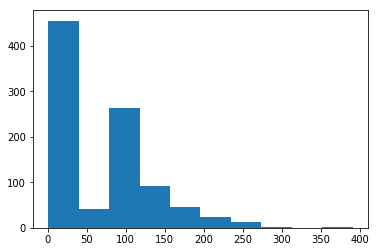

In [9]:
plt.hist(flavorDB_pandas["molecule_quantity"])

In [10]:
full_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if True: # or len(set1) < 5: # To set if you want to consider all ingredients
        for molecule in set1:
            full_G.add_node(ingredient_1)
            full_G.node[ingredient_1]["ingredient_node"] = True
            full_G.add_node(molecule)
            full_G.node[molecule]["molecule_node"] = True
            full_G.add_edge(ingredient_1, molecule)

In [11]:
ingredient_nodes = nx.get_node_attributes(full_G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(full_G, 'molecule_node').keys()

print("total number of nodes: ", full_G.number_of_nodes())
print("total number of ingredient nodes: ", len(ingredient_nodes))
print("total number of molecule nodes: ", len(molecule_nodes))

total number of nodes:  2714
total number of ingredient nodes:  933
total number of molecule nodes:  1781


In [12]:
print("total number of edges: ", full_G.number_of_edges())
print("total possible number of edges: 1779 molecules * 935 ingredients = 1663365")

total number of edges:  60027
total possible number of edges: 1779 molecules * 935 ingredients = 1663365


## Demonstration Using Cheese and Tomatoes

In [13]:
demo_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if ingredient_1 in ["Tomato", "Mozzarella Cheese"]:
        for molecule in set1:
            # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
            demo_G.add_node(ingredient_1)
            demo_G.node[ingredient_1]["ingredient_node"] = True
            demo_G.add_node(molecule)
            demo_G.node[molecule]["molecule_node"] = True
            demo_G.add_edge(ingredient_1, molecule)

In [14]:
ingredient_nodes = nx.get_node_attributes(demo_G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(demo_G, 'molecule_node').keys()

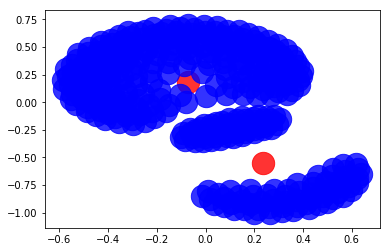

In [15]:
pos=nx.spring_layout(demo_G)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=ingredient_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=molecule_nodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


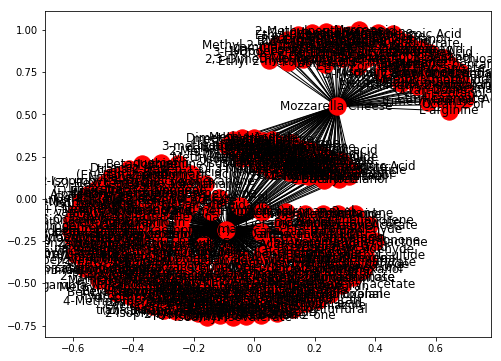

In [16]:
#Plotting the Graph 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(demo_G, ax=ax)
plt.show()

In [17]:
centrality = nx.eigenvector_centrality(demo_G)

In [18]:
centrality

{'Mozzarella Cheese': 0.22466774538382991,
 'lactic acid': 0.05255561376568992,
 '8-Nonen-2-one': 0.01319094544208482,
 'Tiglic aldehyde': 0.01319094544208482,
 '1-Hexanol': 0.05255561376568992,
 'Methyl Hexanoate': 0.05255561376568992,
 'Butylamine': 0.05255561376568992,
 'Methyl Linoleate': 0.05255561376568992,
 'Isobutyric Acid': 0.05255561376568992,
 'Styrene': 0.01319094544208482,
 'trimethylamine': 0.01319094544208482,
 'S-Methyl thiobutyrate': 0.01319094544208482,
 'Ethyl 2-methylbutyrate': 0.01319094544208482,
 'Methyl Dodecanoate': 0.01319094544208482,
 'Pentanal': 0.05255561376568992,
 '2-Methylbutyraldehyde': 0.05255561376568992,
 '4-Methyl-2-oxovaleric acid': 0.01319094544208482,
 'Ethyl caproate': 0.01319094544208482,
 'Methyl octanoate': 0.05255561376568992,
 'Methyl Acetate': 0.05255561376568992,
 'Isoamyl butyrate': 0.05255561376568992,
 'Ethyl methyl disulfide': 0.01319094544208482,
 'Furfuryl Alcohol': 0.01319094544208482,
 'Isoamylamine': 0.05255561376568992,
 'Hexan

## Another Demo

In [19]:
demo_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if ingredient_1 in ["Lobster", "Beef"]:
        for molecule in set1:
            # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
            demo_G.add_node(ingredient_1)
            demo_G.node[ingredient_1]["ingredient_node"] = True
            demo_G.add_node(molecule)
            demo_G.node[molecule]["molecule_node"] = True
            demo_G.add_edge(ingredient_1, molecule)

In [20]:
ingredient_nodes = nx.get_node_attributes(demo_G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(demo_G, 'molecule_node').keys()

In [21]:
node_to_edges_dict = {}
for node in demo_G.node:
    node_to_edges_dict[node] = len(demo_G.edges(node))
node_to_edges_dict

{'Lobster': 6,
 'Octanal': 1,
 'thiamine': 2,
 'CID 644104': 2,
 'Thiamine Hydrochloride': 2,
 'Bis(methylthio)methane': 2,
 'Heptanoic Acid': 2,
 'Beef': 92,
 'L-histidine': 1,
 'Methyl Hexanoate': 1,
 'Ethyl methyl sulfide': 1,
 'Styrene': 1,
 '2,4-Hexadienal': 1,
 'Dl-Alanine': 1,
 '6-Methyl-5-Hepten-2-One': 1,
 'Methyl Acetate': 1,
 'alpha-TERPINEOL': 1,
 'Ethyl methyl disulfide': 1,
 'Methyl propyl disulfide': 1,
 'Ethyl Stearate': 1,
 'Furfuryl Alcohol': 1,
 'gamma-Butyrolactone': 1,
 'palmitic acid': 1,
 'Octan-2-ol': 1,
 '2,5-Diethyl-3-Methylpyrazine': 1,
 'Tetradecanal': 1,
 '1-Dodecanol': 1,
 'gamma-Nonanolactone': 1,
 'Propyl acetate': 1,
 'Dimethyl trisulfide': 1,
 'Pyruvic acid': 1,
 '1-Propanethiol': 1,
 '4-isopropylbenzaldehyde': 1,
 'Alpha-Pinene': 1,
 '2,5-Dimethylfuran': 1,
 '50-69-1': 1,
 '1-(furan-2-yl)pentan-1-one': 1,
 'ethanol': 1,
 '1-Butanethiol': 1,
 '4-Methylpentanoic Acid': 1,
 '2-Pentylthiophene': 1,
 '2,3-Diethyl-5-Methylpyrazine': 1,
 'gamma-Valerolactone

In [22]:
connected_nodes_only = [k for k,v in node_to_edges_dict.items() if v >= 2]


In [23]:
connected_edges_only = []
for node1 in connected_nodes_only:
    for node2 in connected_nodes_only :
        if node1 != node2:
            edge = tuple([node1, node2])
            connected_edges_only.append(edge)

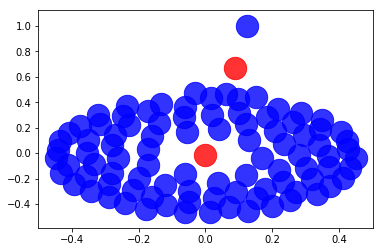

In [24]:
pos=nx.spring_layout(demo_G)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=ingredient_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=molecule_nodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

In [25]:
connected_nodes_only

['Lobster',
 'thiamine',
 'CID 644104',
 'Thiamine Hydrochloride',
 'Bis(methylthio)methane',
 'Heptanoic Acid',
 'Beef']

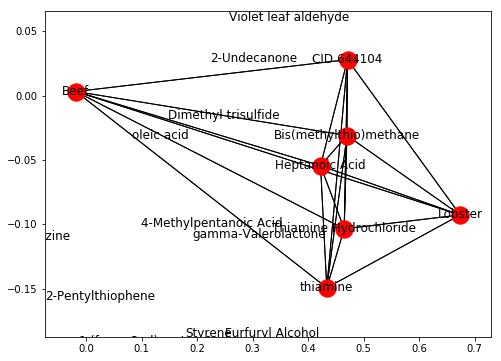

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(demo_G, edgelist = connected_edges_only, nodelist=connected_nodes_only, ax=ax)
plt.show()